## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import glob
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import copy
import pandas as pd
import numpy as np
import torch

from sklearn.metrics import roc_auc_score

os.environ["WANDB_SILENT"] = "true"

from owkin.training import train, RocLoss
from owkin.dataset import build_dataset
from owkin.models.mono_models import MLP, SVM
from owkin.models.aggregators import SmoothMaxAggregator, MaxAggregator

## Get the Data

In [3]:
X_train, X_train_mean, y_train, X_val, X_val_mean, y_val, X_test, X_test_mean, df_test = build_dataset()

## Training

In [4]:
list_kernel = ['linear', 'poly', 'rbf', 'sigmoid']
list_C = [1e-0, 1e1, 1e2, 1e3]

In [5]:
mono_res = {}
smooth_max_res = {}
max_res = {}

In [6]:
for kernel in list_kernel:
    mono_res[kernel] = dict()
    smooth_max_res[kernel] = dict()
    max_res[kernel] = dict()
    for C in list_C:    
        mono_model = SVM(C=C, kernel=kernel)
        mono_model.svm.fit(X_train_mean, y_train)
        
        smooth_max_model = SmoothMaxAggregator(mono_model)
        max_model = MaxAggregator(mono_model)

        mono_val_pred = mono_model(X_val_mean)
        smooth_max_val_pred = smooth_max_model(X_val)
        max_val_pred = max_model(X_val)
        

        mono_res[kernel][C] = roc_auc_score(y_val, mono_val_pred)
        smooth_max_res[kernel][C] = roc_auc_score(y_val, smooth_max_val_pred)
        max_res[kernel][C] = roc_auc_score(y_val, max_val_pred)
#        print(f"kernel={kernel.ljust(7)}, C={'{:.0e}'.format(C)}, mono_val_score = {'{:.3f}'.format(roc_auc_score(y_val, mono_val_pred))}, val_score={'{:.3f}'.format(roc_auc_score(y_val, val_pred))}")

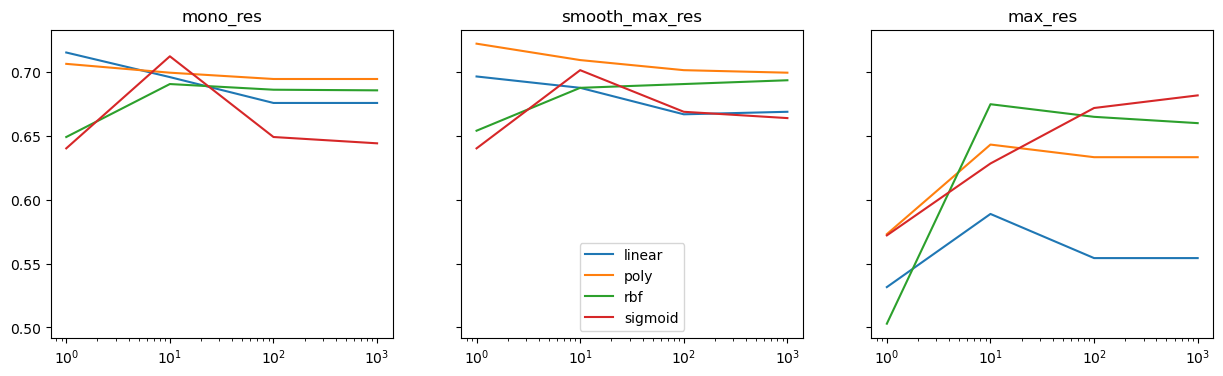

In [7]:
fig, ax = plt.subplots(1,3, figsize=(15,4), sharey=True)
for kernel in list_kernel:
    ax[0].plot(list(mono_res[kernel].keys()), list(mono_res[kernel].values()), label = kernel)
    ax[1].plot(list(smooth_max_res[kernel].keys()), list(smooth_max_res[kernel].values()), label = kernel)
    ax[2].plot(list(max_res[kernel].keys()), list(max_res[kernel].values()), label = kernel)

ax[0].set_xscale('log')
ax[0].set_title("mono_res")

ax[1].set_xscale('log')
ax[1].set_title("smooth_max_res")
ax[1].legend(loc = "lower center")

ax[2].set_xscale('log')
ax[2].set_title("max_res")

plt.show()

In [8]:
list_degree = [2,3,4,5,6]

In [9]:
for degree in list_degree:
    mono_res[degree] = dict()
    smooth_max_res[degree] = dict()
    max_res[degree] = dict()
    for C in list_C:    
        mono_model = SVM(C=C, kernel=kernel)
        mono_model.svm.fit(X_train_mean, y_train)
        
        smooth_max_model = SmoothMaxAggregator(mono_model)
        max_model = MaxAggregator(mono_model)

        mono_val_pred = mono_model(X_val_mean)
        smooth_max_val_pred = smooth_max_model(X_val)
        max_val_pred = max_model(X_val)
        

        mono_res[degree][C] = roc_auc_score(y_val, mono_val_pred)
        smooth_max_res[degree][C] = roc_auc_score(y_val, smooth_max_val_pred)
        max_res[degree][C] = roc_auc_score(y_val, max_val_pred)

In [10]:
for degree in list_degree:
    ax[0].plot(list(mono_res[degree].keys()), list(mono_res[degree].values()), label = degree)
    ax[1].plot(list(smooth_max_res[degree].keys()), list(smooth_max_res[degree].values()), label = degree)
    ax[2].plot(list(max_res[degree].keys()), list(max_res[degree].values()), label = degree)

ax[0].set_xscale('log')
ax[0].set_title("mono_res")

ax[1].set_xscale('log')
ax[1].set_title("smooth_max_res")
ax[1].legend(loc = "lower center")

ax[2].set_xscale('log')
ax[2].set_title("max_res")

plt.show()